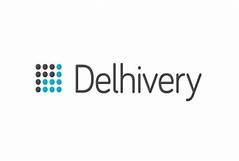

**Data Analytics and Visualization by Piyush Joshi**

COLAB LINK:https://colab.research.google.com/drive1djaiZer5uvb_RsZ-d19a9m-GQNWZ8Ek9?usp=sharing

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system.The company wants to understand and process the data coming out of data engineering
pipelines is clean, sanitize and manipulate data to get useful features out of raw fields to make sense out of the raw data and help the data science team to build forecasting models on it.

**Column Profiling:**
1. data - tells whether the data is testing or training data
2. trip_creation_time - Timestamp of trip creation
3. route_schedule_uuid - Unique ID for a particular route schedule
4. route_type- Transportation type
a. FTL - Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente - Destination ID
9. destination_name - Destination Name
10. od_start_time- Trip start time
11. od_end_time - Trip end time
12. start_scan_to_end_scan- Time taken to deliver from source to destination
13. is_cutoff - Unknown field
14. cutoff_factor- Unknown field
15. cutoff_timestamp - Unknown field
16. actual_distance_to_destination- Distance in kms between source and destination
warehouse
17. actual_time- Actual time taken to complete the delivery (Cumulative)
18. osrm_time- An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance- An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor- Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field

# 1. Basic data cleaning and exploration:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

--2024-10-11 11:54:41--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.71, 18.64.229.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv?1642751181’

delhivery_data.csv? 100%[===================>]  53.04M  89.0MB/s    in 0.6s    

2024-10-11 11:54:42 (89.0 MB/s) - ‘delhivery_data.csv?1642751181’ saved [55617130/55617130]



In [ ]:
df=pd.read_csv('delhivery_data.CSV',dayfirst=True)
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
#Analyzing Null Values in Percentage
df.isnull().sum()/len(df)*100

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
# Selecting the columns that we want to convert to datetime
columns_to_convert = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

# Using apply `pd.to_datetime`to columns_to_convert
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime, dayfirst=True, format='mixed', errors='coerce')

In [ ]:
df[columns_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  144316 non-null  datetime64[ns]
 1   od_start_time       144316 non-null  datetime64[ns]
 2   od_end_time         144316 non-null  datetime64[ns]
 3   cutoff_timestamp    144316 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 5.5 MB


In [ ]:
#Checking to see duplicates
df.duplicated().any()

False

In [ ]:
#3. Analyze structure & characteristics of the dataset.
print("No. of rows:{} ".format(df.shape[0]))
print("No. of columns:{} ".format(df.shape[1]))

No. of rows:144316 
No. of columns:24 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

In [ ]:
for col in df.columns:
    unique_values=df[col].unique()
    print(f"Unique values in Column-> {col}:")
    print(unique_values)
    print("-"*70)


Unique values in Column-> data:
['training' 'test']
----------------------------------------------------------------------
Unique values in Column-> trip_creation_time:
<DatetimeArray>
['2018-09-20 02:35:36.476840', '2018-09-23 06:42:06.021680',
 '2018-09-14 15:42:46.437249', '2018-09-13 20:44:19.424489',
 '2018-09-29 22:21:45.149226', '2018-09-17 21:26:00.454695',
 '2018-09-12 01:33:48.711350', '2018-10-01 16:00:45.719099',
 '2018-09-27 14:16:14.819357', '2018-09-13 16:41:41.992300',
 ...
 '2018-09-13 20:47:45.942988', '2018-10-01 19:56:20.111591',
 '2018-09-23 01:31:09.129173', '2018-10-01 18:17:37.047270',
 '2018-09-26 14:05:52.096792', '2018-09-26 19:50:29.657378',
 '2018-09-14 18:45:34.164734', '2018-09-22 11:30:41.399439',
 '2018-09-17 11:35:28.838714', '2018-09-20 16:24:28.436231']
Length: 14787, dtype: datetime64[ns]
----------------------------------------------------------------------
Unique values in Column-> route_schedule_uuid:
['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d

**Insights:** After removal of null values the No. of rows are144316 and No. of columns are 24.

**Recommendation:** Go ahead with confidence for exploratory data analysis techniques.



# 2. Merging the rows


Since delivery details of one package is divided into several rows

**1.Grouping by segment**

In [ ]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']


In [ ]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB


In [ ]:
# Creating a copy of the original DataFrame
df_merged = df.copy()

#b. Grouping by 'segment_key' and apply cumsum() to the desired columns
df_merged[['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum']] = df_merged.groupby('segment_key')[['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']].cumsum()

# Displaying the merged DataFrame
df_merged.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0


**2. Aggregating at segment level**

In [ ]:
df_segment_agg=df_merged.copy()

In [ ]:
#Aggregating at segment level
create_segment_dict = {
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'trip_creation_time': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'cutoff_timestamp': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum',
    'segment_actual_time_sum':'last',
    'segment_osrm_distance_sum':'last',
    'segment_osrm_time_sum':'last',
    'data':'first',
    'route_type':'first',
    'is_cutoff':'first'

}

In [ ]:
#b.Grouping the data by segment_key
#c.The aggregation functions specified in the create_segment_dict are applied to each group of rows with the same segment_key.
df_segment_level = df_segment_agg.groupby('segment_key').agg(create_segment_dict)
df_segment_level.reset_index(inplace=True)
df_segment_level.drop(columns=['segment_actual_time_sum', 'segment_osrm_distance_sum', 'segment_osrm_time_sum'], inplace=True) #dropping cumulated cols.
df_segment_level.head(3)

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,data,route_type,is_cutoff
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-13 12:40:43,383.759164,6484.0,3464.0,4540.1261,728.0,670.6205,534.0,training,FTL,True
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 14:56:29,440.973689,9198.0,4323.0,6037.6386,820.0,649.8528,474.0,training,FTL,True
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 02:41:24,24.644021,96.0,55.0,60.3157,46.0,28.1995,26.0,training,Carting,True


In [ ]:
#d.sorting df_segment_level by segment_key and od_end_time:
df_segment_level_sorted = df_segment_level.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])
df_segment_level.head(5)

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,data,route_type,is_cutoff
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-13 12:40:43,383.759164,6484.0,3464.0,4540.1261,728.0,670.6205,534.0,training,FTL,True
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 14:56:29,440.973689,9198.0,4323.0,6037.6386,820.0,649.8528,474.0,training,FTL,True
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 02:41:24,24.644021,96.0,55.0,60.3157,46.0,28.1995,26.0,training,Carting,True
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 01:39:28,48.542890,303.0,155.0,209.1151,95.0,55.9899,39.0,training,Carting,True
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-14 16:54:36,237.439610,2601.0,1427.0,1975.7409,608.0,317.7408,231.0,training,FTL,True


**Insights:**

1.  Segment_key denotes unique identifier for different segments of a trip based
on the combination of the trip_uuid, source_center, and destination_center representing unique id for the subset of the package delivery i.e. having same trip_uid and start time but could be having different source,destinations and thus different end time.

2.  Cutoff_timestamp seem to denote the delivery deadlines, several OSRM features, as an open-source routing engine time calculator which computes the
shortest path between points in a given map.

**Recommendation:**

1. Route Optimization by comparing OSRM features and Actual featues(time and distance)

2. Comparing the performance of FTL vs carting in terms of delivery times and cutoff compliance.

# 3. Feature Engineering:

In [ ]:
#1. Calculate time taken between od_start_time and od_end_time
df_segment_level['od_time_diff_hour'] = (df_segment_level['od_end_time'] - df_segment_level['od_start_time']).dt.total_seconds() / 3600
df_segment_level.head(3)

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,data,route_type,is_cutoff,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-13 12:40:43,...,6484.0,3464.0,4540.1261,728.0,670.6205,534.0,training,FTL,True,21.010074
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 14:56:29,...,9198.0,4323.0,6037.6386,820.0,649.8528,474.0,training,FTL,True,16.658423
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 02:41:24,...,96.0,55.0,60.3157,46.0,28.1995,26.0,training,Carting,True,0.980540


In [ ]:
#2.Spliting and extract features out of Source. City-place-code(State)
df_segment_level['Source_City'] = df_segment_level['source_name'].str.split('_').str[0]
df_segment_level['Source_Place'] = df_segment_level['source_name'].str.split('_').str[1]
df_segment_level['Source_Code'] = df_segment_level['source_name'].str.split('_').str[2]
df_segment_level['Source_State'] = df_segment_level['source_name'].str.extract(r'\((.*?)\)')[0]
#3.Spliting and extract features out of Destination. City-place-code(State)
df_segment_level['Destination_City'] = df_segment_level['destination_name'].str.split('_').str[0]
df_segment_level['Destination_Place'] = df_segment_level['destination_name'].str.split('_').str[1]
df_segment_level['Destination_Code'] = df_segment_level['destination_name'].str.split('_').str[2]
df_segment_level['Destination_State'] = df_segment_level['destination_name'].str.extract(r'\((.*?)\)')[0]
df_segment_level.head(3)


,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,is_cutoff,od_time_diff_hour,Source_City,Source_Place,Source_Code,Source_State,Destination_City,Destination_Place,Destination_Code,Destination_State
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-13 12:40:43,...,True,21.010074,Kanpur,Central,H,Uttar Pradesh,Gurgaon,Bilaspur,HB (Haryana),Haryana
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 14:56:29,...,True,16.658423,Bhopal,Trnsport,H (Madhya Pradesh),Madhya Pradesh,Kanpur,Central,H,Uttar Pradesh
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 02:41:24,...,True,0.980540,Doddablpur,ChikaDPP,D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D (Karnataka),Karnataka


In [ ]:
#4.Trip_creation_time: Extract features like month, year, day, etc.
df_segment_level['trip_creation_month'] = df_segment_level['trip_creation_time'].dt.month
df_segment_level['trip_creation_year'] = df_segment_level['trip_creation_time'].dt.year
df_segment_level['trip_creation_day'] = df_segment_level['trip_creation_time'].dt.day
df_segment_level['trip_creation_dayofweek'] = df_segment_level['trip_creation_time'].dt.day_name()
df_segment_level['time_of_trip_creation'] = df_segment_level['trip_creation_time'].dt.time
df_segment_level.head(3)

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,Source_State,Destination_City,Destination_Place,Destination_Code,Destination_State,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_dayofweek,time_of_trip_creation
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-13 12:40:43,...,Uttar Pradesh,Gurgaon,Bilaspur,HB (Haryana),Haryana,9,2018,12,Wednesday,00:00:16.535741
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 14:56:29,...,Madhya Pradesh,Kanpur,Central,H,Uttar Pradesh,9,2018,12,Wednesday,00:00:16.535741
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 02:41:24,...,Karnataka,Chikblapur,ShntiSgr,D (Karnataka),Karnataka,9,2018,12,Wednesday,00:00:22.886430


**Insights:** Most of the trips were created in 2018.

**Recommendation:** It can be useful in identifying days of the week and locations that are most difficult and easier in terms of logistics and transit.

# 4. In-depth analysis:


**1. Grouping and Aggregating at Trip-level**

In [ ]:
df_trip_level=df_segment_level.copy()
create_trip_dict= {
    'segment_key': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'trip_creation_time': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'cutoff_timestamp': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum',
    'Source_City': 'first',
    'Source_Place': 'first',
    'Source_Code': 'first',
    'Source_State': 'first',
    'Destination_City': 'first',
    'Destination_Place': 'first',
    'Destination_Code': 'first',
    'Destination_State': 'first',
    'trip_creation_month': 'first',
    'trip_creation_year': 'first',
    'trip_creation_day': 'first',
    'trip_creation_dayofweek': 'first',
    'time_of_trip_creation': 'first',
    'od_time_diff_hour': 'sum',
    'data': 'first',
    'route_type': 'first',
    'is_cutoff': 'first'
}

In [ ]:
df_trip_level = df_trip_level.groupby('trip_uuid').agg(create_trip_dict)
df_trip_level.reset_index(inplace=True)
df_trip_level.head(3)

,trip_uuid,segment_key,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,Destination_State,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_dayofweek,time_of_trip_creation,od_time_diff_hour,data,route_type,is_cutoff
0,trip-153671041653548748,trip-153671041653548748_IND209304AAA_IND000000ACB,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2018-09-13 12:40:43,...,Haryana,9,2018,12,Wednesday,00:00:16.535741,37.668497,training,FTL,True
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2018-09-12 02:41:24,...,Karnataka,9,2018,12,Wednesday,00:00:22.886430,3.026865,training,Carting,True
2,trip-153671043369099517,trip-153671043369099517_IND000000ACB_IND160002AAC,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,2018-09-14 16:54:36,...,Punjab,9,2018,12,Wednesday,00:00:33.691250,65.572709,training,FTL,True


**2. Outlier Detection & Treatment**

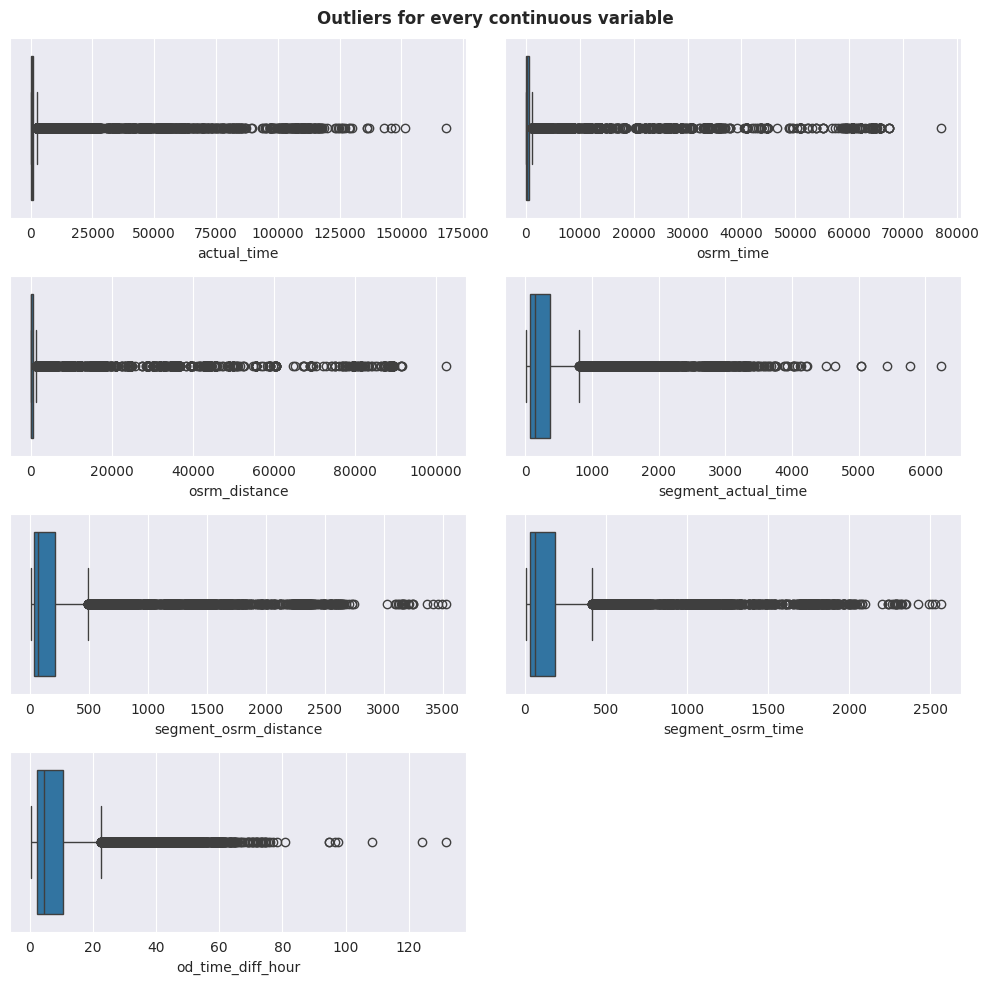

<Figure size 640x480 with 0 Axes>

In [ ]:
#4.2.Outlier Detection & Treatment: Outliers for every continuous variable
fig, axis=plt.subplots(4,2,figsize=(10,10))
fig.suptitle("Outliers for every continuous variable",weight='bold')
sns.boxplot(x='actual_time',data=df_trip_level,ax=axis[0,0])
sns.boxplot(x='osrm_time',data=df_trip_level,ax=axis[0,1])
sns.boxplot(x='osrm_distance',data=df_trip_level,ax=axis[1,0])
sns.boxplot(x='segment_actual_time',data=df_trip_level,ax=axis[1,1])
sns.boxplot(x='segment_osrm_distance',data=df_trip_level,ax=axis[2,0])
sns.boxplot(x='segment_osrm_time',data=df_trip_level,ax=axis[2,1])
sns.boxplot(x='od_time_diff_hour',data=df_trip_level,ax=axis[3,0])

fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

# Remove the empty subplot
fig.delaxes(axis[2, 1])
plt.tight_layout()
# Adjust the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# Show the plot
plt.show()

In [ ]:
#Remove/clip the data between the 5 percentile and 95 percentile
continuous_cols = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time', 'od_time_diff_hour']
# Calculating the IQR for each continuous column
Q1 = df_trip_level[continuous_cols].quantile(0.25)
Q3 = df_trip_level[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing rows with outliers
df_trip_level = df_trip_level[~((df_trip_level[continuous_cols] < lower_bound) | (df_trip_level[continuous_cols] > upper_bound)).any(axis=1)]

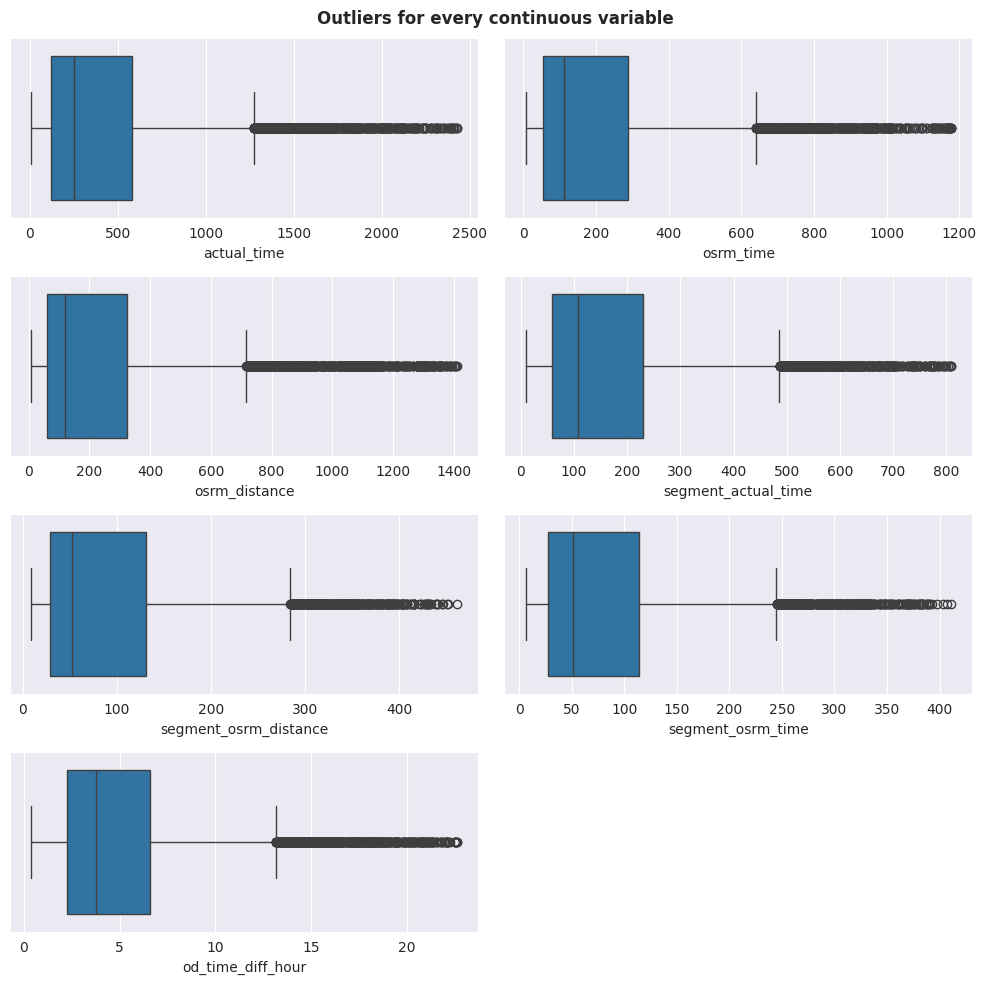

<Figure size 640x480 with 0 Axes>

In [ ]:
#Checkng outliers for every continuous variable
fig, axis=plt.subplots(4,2,figsize=(10,10))
fig.suptitle("Outliers for every continuous variable",weight='bold')
sns.boxplot(x='actual_time',data=df_trip_level,ax=axis[0,0])
sns.boxplot(x='osrm_time',data=df_trip_level,ax=axis[0,1])
sns.boxplot(x='osrm_distance',data=df_trip_level,ax=axis[1,0])
sns.boxplot(x='segment_actual_time',data=df_trip_level,ax=axis[1,1])
sns.boxplot(x='segment_osrm_distance',data=df_trip_level,ax=axis[2,0])
sns.boxplot(x='segment_osrm_time',data=df_trip_level,ax=axis[2,1])
sns.boxplot(x='od_time_diff_hour',data=df_trip_level,ax=axis[3,0])

fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

# Remove the empty subplot
fig.delaxes(axis[2, 1])
plt.tight_layout()
# Adjust the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# Show the plot
plt.show()

In [ ]:
df_trip_level.head(3)

,trip_uuid,segment_key,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,Destination_State,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_dayofweek,time_of_trip_creation,od_time_diff_hour,data,route_type,is_cutoff
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2018-09-12 02:41:24,...,Karnataka,9,2018,12,Wednesday,00:00:22.886430,3.026865,training,Carting,True
3,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 01:13:56,...,Maharashtra,9,2018,12,Wednesday,00:01:00.113710,1.674916,training,Carting,True
4,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,2018-09-12 01:47:26,...,Karnataka,9,2018,12,Wednesday,00:02:09.740725,11.972484,training,FTL,True


**3. Performing one-hot encoding on categorical features.**

In [ ]:
#4.3. Performng one-hot encoding using pandas get_dummies
encoded_features = pd.get_dummies(df_trip_level[['data', 'route_type']],
                                   prefix=['data', 'route_type'],
                                   dtype=int)
# Concatenate the encoded features with the original DataFrame
df_trip_level = pd.concat([df_trip_level, encoded_features], axis=1)

# Drop the original categorical columns
df_trip_level.drop(['data', 'route_type'], axis=1, inplace=True)

# Display the updated DataFrame
df_trip_level.head()

,trip_uuid,segment_key,source_center,source_name,destination_center,destination_name,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp,...,trip_creation_year,trip_creation_day,trip_creation_dayofweek,time_of_trip_creation,od_time_diff_hour,is_cutoff,data_test,data_training,route_type_Carting,route_type_FTL
1,trip-153671042288605164,trip-153671042288605164_IND561203AAB_IND562101AAA,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2018-09-12 02:41:24,...,2018,12,Wednesday,00:00:22.886430,3.026865,True,0,1,1,0
3,trip-153671046011330457,trip-153671046011330457_IND400072AAB_IND401104AAA,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,2018-09-12 01:13:56,...,2018,12,Wednesday,00:01:00.113710,1.674916,True,0,1,1,0
4,trip-153671052974046625,trip-153671052974046625_IND583101AAA_IND583201AAA,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,2018-09-12 01:47:26,...,2018,12,Wednesday,00:02:09.740725,11.972484,True,0,1,0,1
5,trip-153671055416136166,trip-153671055416136166_IND600056AAA_IND602105AAB,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,2018-09-12 02:29:38,...,2018,12,Wednesday,00:02:34.161600,3.174797,True,0,1,1,0
6,trip-153671066201138152,trip-153671066201138152_IND600044AAD_IND600048AAA,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,2018-09-12 00:43:26,...,2018,12,Wednesday,00:04:22.011653,1.633427,True,0,1,1,0


**4. Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler**

In [ ]:
data=df_trip_level.copy()

In [ ]:
#4. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_features = ['actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                      'segment_osrm_distance', 'segment_osrm_time', 'od_time_diff_hour']
# For normalization:
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data[numerical_features].head(3)

,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour
1,0.161224,0.174061,0.185917,0.16500,0.166131,0.145679,0.118617
3,0.030178,0.015358,0.016120,0.06250,0.023894,0.024691,0.057777
4,0.226126,0.171502,0.183675,0.41375,0.304585,0.269136,0.521183


**Insights:**
1. Huge no. of outliers in the continuous variables despite removal of outliers outside the 5 to 95% IQR.
2. Boxplot comparision of actual time, OSRM time and segment OSRM time reveals the distribution of segment OSRM time on lower ranges followed by OSRM time.
3. Boxplot comparision of OSRM distance and segment OSRM distance reveals the distribution of OSRM distance calculations on lower ranges.

**Recommendation:** Leverage OSRM for shortest time and distance analysis but ensure its time and distance estimates remain realistic when compared with actual times. While lower OSRM times/distances are expected, if the difference is too large, further refinement or validation might be necessary to reflect real-world driving conditions more accurately.


# 5. Hypothesis Testing:
**1. Perform hypothesis testing / visual analysis between :**

**a. Actual_time aggregated value and OSRM time aggregated value for Non-Normalized and Normalized data**

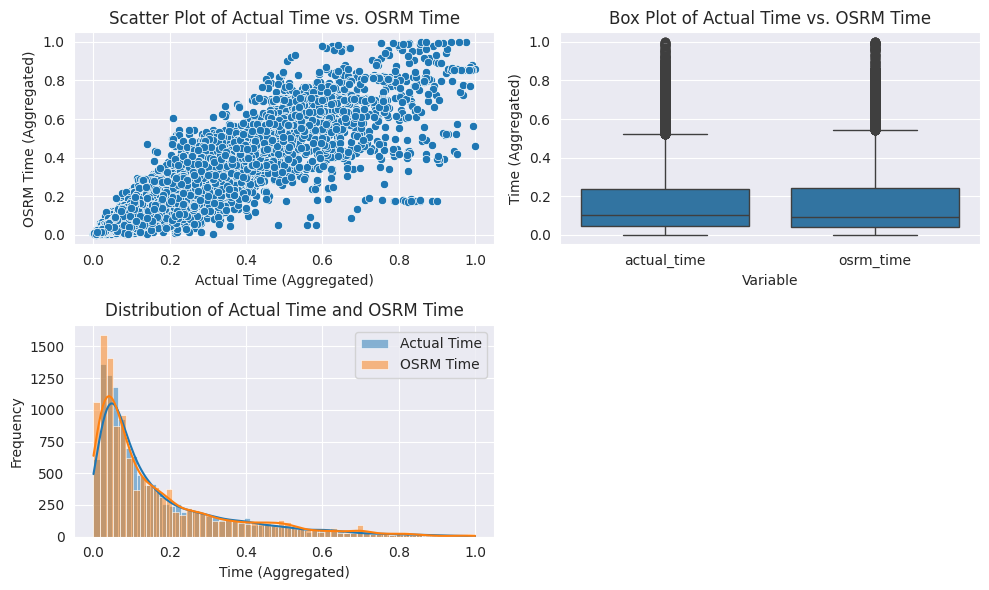

In [ ]:
# Creatng a 2x2 subplot for the visual analysis of NORMALIZED features
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjusted figure size

# Scatter plot
sns.scatterplot(x='actual_time', y='osrm_time', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot of Actual Time vs. OSRM Time')
axs[0, 0].set_xlabel('Actual Time (Aggregated)')
axs[0, 0].set_ylabel('OSRM Time (Aggregated)')

# Box plot
melted_data = pd.melt(data, id_vars=[], value_vars=['actual_time', 'osrm_time'], var_name='Variable', value_name='Time')
sns.boxplot(x='Variable', y='Time', data=melted_data, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Actual Time vs. OSRM Time')
axs[0, 1].set_xlabel('Variable')
axs[0, 1].set_ylabel('Time (Aggregated)')

# Histogram
sns.histplot(data['actual_time'], label='Actual Time', kde=True, ax=axs[1, 0])
sns.histplot(data['osrm_time'], label='OSRM Time', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Actual Time and OSRM Time')
axs[1, 0].set_xlabel('Time (Aggregated)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Remove the empty fourth subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

In [ ]:
from scipy import stats
#H0:There is no significant difference between actual time and OSRM time
#HA:There is a significant difference between actual time and OSRM time
# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['actual_time'], data['osrm_time'])

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between actual time and OSRM time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between actual time and OSRM time.")

T-statistic: 1.1745386469387056
P-value: 0.24020211710966932
Fail to reject the null hypothesis. There is no significant difference between actual time and OSRM time.


**b. actual_time aggregated value and segment actual time aggregated
value.**

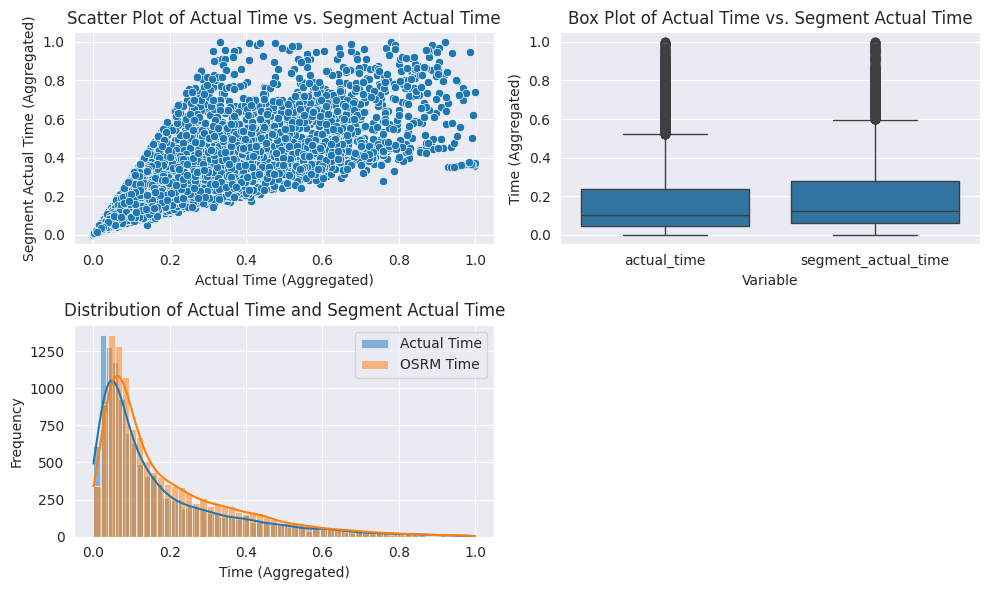

In [ ]:
#5b. actual_time aggregated value and segment actual time aggregated value.

# Creatng a 2x2 subplot for the visual analysis of NORMALIZED features
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjusted figure size

# Scatter plot
sns.scatterplot(x='actual_time', y='segment_actual_time', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot of Actual Time vs. Segment Actual Time')
axs[0, 0].set_xlabel('Actual Time (Aggregated)')
axs[0, 0].set_ylabel('Segment Actual Time (Aggregated)')

# Box plot
melted_data = pd.melt(data, id_vars=[], value_vars=['actual_time', 'segment_actual_time'], var_name='Variable', value_name='Time')
sns.boxplot(x='Variable', y='Time', data=melted_data, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Actual Time vs. Segment Actual Time')
axs[0, 1].set_xlabel('Variable')
axs[0, 1].set_ylabel('Time (Aggregated)')

# Histogram
sns.histplot(data['actual_time'], label='Actual Time', kde=True, ax=axs[1, 0])
sns.histplot(data['segment_actual_time'], label='OSRM Time', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Actual Time and Segment Actual Time')
axs[1, 0].set_xlabel('Time (Aggregated)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Remove the empty fourth subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

In [ ]:
from scipy import stats
#H0:There is no significant difference between actual time and Segmented actual time
#HA:There is a significant difference between actual time and Segmented actual time
# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['actual_time'], data['segment_actual_time'])

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between actual time and Segmented actual time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between actual time and Segmented actual time.")

T-statistic: -23.64537043444747
P-value: 6.48613841728686e-121
Reject the null hypothesis. There is a significant difference between actual time and Segmented actual time.


**c. OSRM distance aggregated value and segment OSRM distance
aggregated value.**

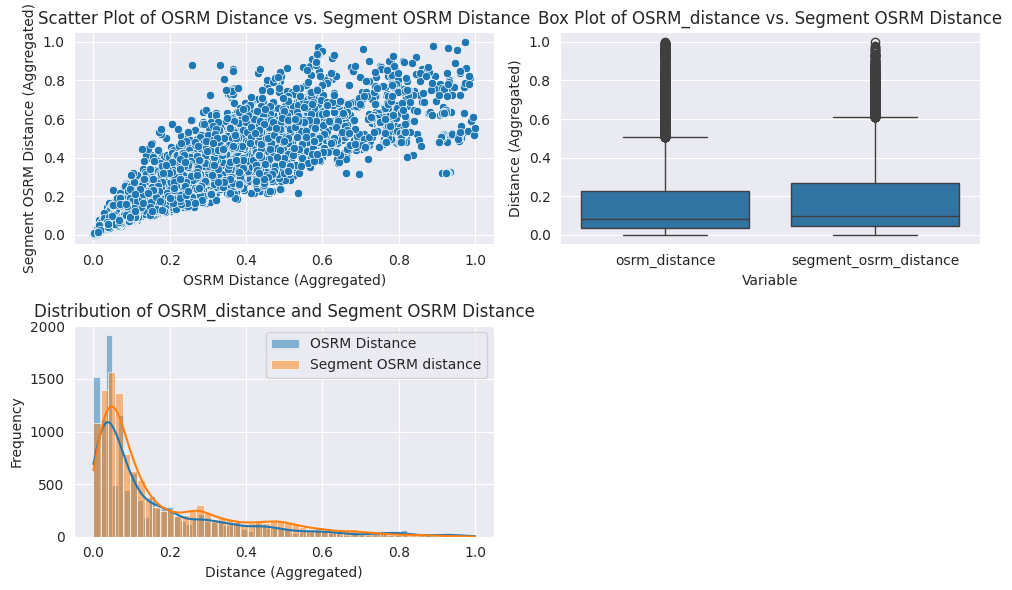

In [ ]:
#5c. OSRM distance aggregated value and segment OSRM distance aggregated value.


# Creatng a 2x2 subplot for the visual analysis of NORMALIZED features
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjusted figure size

# Scatter plot
sns.scatterplot(x='osrm_distance', y='segment_osrm_distance', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot of OSRM Distance vs. Segment OSRM Distance')
axs[0, 0].set_xlabel('OSRM Distance (Aggregated)')
axs[0, 0].set_ylabel('Segment OSRM Distance (Aggregated)')

# Box plot
melted_data = pd.melt(data, id_vars=[], value_vars=['osrm_distance', 'segment_osrm_distance'], var_name='Variable', value_name='Distance')
sns.boxplot(x='Variable', y='Distance', data=melted_data, ax=axs[0, 1]) # Now using 'Distance' for y-axis
axs[0, 1].set_title('Box Plot of OSRM_distance vs. Segment OSRM Distance')
axs[0, 1].set_xlabel('Variable')
axs[0, 1].set_ylabel('Distance (Aggregated)')

# Histogram
sns.histplot(data['osrm_distance'], label='OSRM Distance', kde=True, ax=axs[1, 0])
sns.histplot(data['segment_osrm_distance'], label='Segment OSRM distance', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of OSRM_distance and Segment OSRM Distance')
axs[1, 0].set_xlabel('Distance (Aggregated)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Removing the empty fourth subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

In [ ]:
#Null Hypothesis (H0): There is no significant difference between the OSRM distance aggregated value and the segment OSRM distance aggregated value.
#Alternative Hypothesis (HA): There is a significant difference between the OSRM distance aggregated value and the segment OSRM distance aggregated value.

t_statistic, p_value = stats.ttest_rel(data['osrm_distance'], data['segment_osrm_distance'])

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between OSRM distance and segment OSRM distance.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between OSRM distance and segment OSRM distance.")


T-statistic: -16.615566798383426
P-value: 2.507647860331687e-61
Reject the null hypothesis. There is a significant difference between OSRM distance and segment OSRM distance.


**d. OSRM time aggregated value and segment OSRM time aggregated
value.**

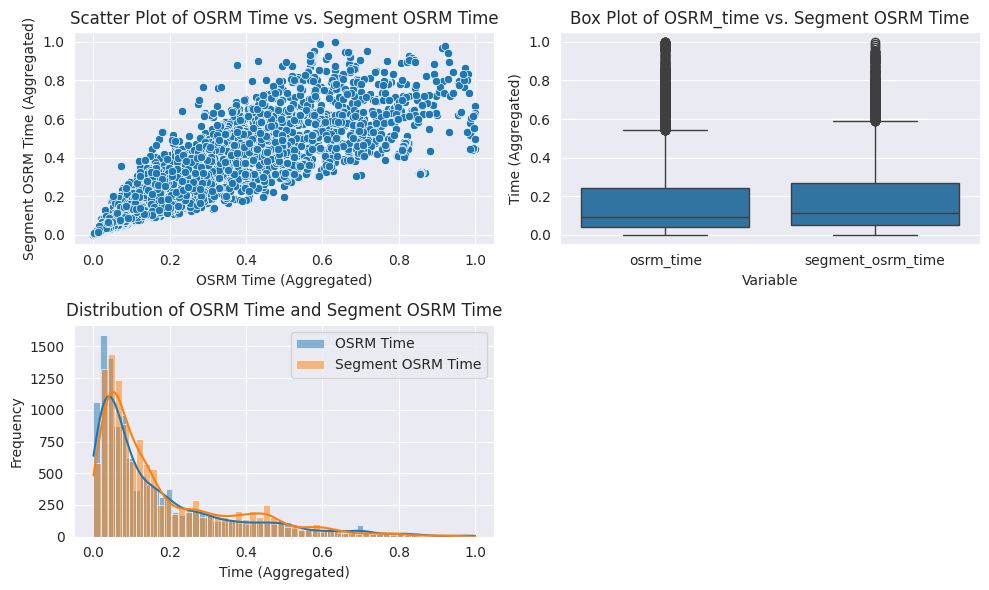

In [ ]:
#5d. OSRM time aggregated value and segment OSRM time aggregated value.

# Creatng a 2x2 subplot for the visual analysis of NORMALIZED features
fig, axs = plt.subplots(2, 2, figsize=(10, 6))


# Scatter plot
sns.scatterplot(x='osrm_time', y='segment_osrm_time', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot of OSRM Time vs. Segment OSRM Time')
axs[0, 0].set_xlabel('OSRM Time (Aggregated)')
axs[0, 0].set_ylabel('Segment OSRM Time (Aggregated)')

# Box plot
melted_data = pd.melt(data, id_vars=[], value_vars=['osrm_time', 'segment_osrm_time'], var_name='Variable', value_name='Time')
sns.boxplot(x='Variable', y='Time', data=melted_data, ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of OSRM_time vs. Segment OSRM Time')
axs[0, 1].set_xlabel('Variable')
axs[0, 1].set_ylabel('Time (Aggregated)')

# Histogram
sns.histplot(data['osrm_time'], label='OSRM Time', kde=True, ax=axs[1, 0])
sns.histplot(data['segment_osrm_time'], label='Segment OSRM Time', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of OSRM Time and Segment OSRM Time')
axs[1, 0].set_xlabel('Time (Aggregated)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

# Removing the empty fourth subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()


In [ ]:
#Null Hypothesis (H0): There is no significant difference between the OSRM time aggregated value and the segment OSRM time aggregated value.
#Alternative Hypothesis (HA): There is a significant difference between the OSRM time aggregated value and the segment OSRM time aggregated value.

t_statistic, p_value = stats.ttest_rel(data['osrm_time'], data['segment_osrm_time'])

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between OSRM time and segment OSRM time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between OSRM time and segment OSRM time.")


T-statistic: -13.867775769147363
P-value: 2.1085455588920463e-43
Reject the null hypothesis. There is a significant difference between OSRM time and segment OSRM time.


**Insights:**

1. OSRM consistently underestimates both time and distance compared to actual values, even after normalization.
2. All comparisons revealed statistically significant differences between the compared variables.

**Recommendations:**

1. Leverage segment-level data for analysis and route optimization.
2. Weigh statistical significance against practical relevance in decision-making.

# 6. Business Insights & Recommendations

**Top 5 Origin and Desitnation Cities and States**

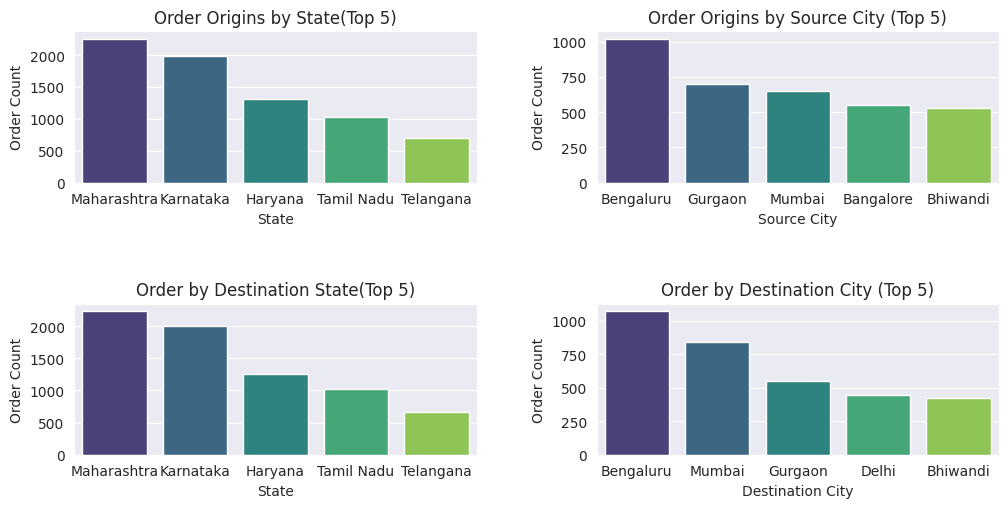

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(11, 6))

# Top 5 Source States
state_counts = df_trip_level['Source_State'].value_counts().reset_index().head(5)
state_counts.columns = ['Source_State', 'Order_Count']
sns.barplot(x='Source_State', y='Order_Count', data=state_counts, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Order Origins by State(Top 5)')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Order Count')

# Top 5 Source Cities
city_counts = df_trip_level['Source_City'].value_counts().reset_index().head(5)
city_counts.columns = ['Source_City', 'Order_Count']
sns.barplot(x='Source_City', y='Order_Count', data=city_counts, palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Order Origins by Source City (Top 5)')
axs[0, 1].set_xlabel('Source City')
axs[0, 1].set_ylabel('Order Count')

# Top 5 Destination States
state_counts = df_trip_level['Destination_State'].value_counts().reset_index().head(5)
state_counts.columns = ['Destination_State', 'Order_Count']
sns.barplot(x='Destination_State', y='Order_Count', data=state_counts, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Order by Destination State(Top 5)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Order Count')

# Top 5 Destination Cities
city_counts = df_trip_level['Destination_City'].value_counts().reset_index().head(5)
city_counts.columns = ['Destination_City', 'Order_Count']
sns.barplot(x='Destination_City', y='Order_Count', data=city_counts, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Order by Destination City (Top 5)')
axs[1, 1].set_xlabel('Destination City')
axs[1, 1].set_ylabel('Order Count')

# Adjust layout to add space between rows
plt.tight_layout(pad=4.0)
plt.show()

**Busiest corridor**

In [ ]:
# Group by trip and sort by od_end_time
trip_segments = data.groupby('trip_uuid').apply(lambda x: x.sort_values(by='od_end_time')[['Source_City', 'Source_State', 'Destination_City', 'Destination_State']]).reset_index() # Remove drop=True or set to drop=False

# Function to extract intermediate points
def get_intermediate_points(segments):
    source_points = segments[['Source_City', 'Source_State']].apply(lambda row: f"{row['Source_City']} ({row['Source_State']})", axis=1).tolist()
    # Get the last row using .iloc[-1] and access values directly
    dest_point = f"{segments['Destination_City'].iloc[-1]} ({segments['Destination_State'].iloc[-1]})"
    intermediate_points = source_points[1:] + [dest_point]
    return intermediate_points

# Apply the function to each group of the DataFrame
trip_segments['intermediate_points'] = trip_segments.groupby('trip_uuid').apply(lambda group: get_intermediate_points(group.reset_index(drop=True))).reset_index(level=0, drop=True) # This line remains unchanged

# Create routes using city/state names
trip_segments['Most_frequent_route'] = trip_segments.apply(lambda x: f"{x['Source_City']} ({x['Source_State']}) -> {x['Destination_City']} ({x['Destination_State']})", axis=1)

# Find the most frequent corridors
most_frequent_corridors = trip_segments['Most_frequent_route'].value_counts().head(5)
most_frequent_corridors

,count
Most_frequent_route,
Bengaluru (Karnataka) -> Bengaluru (Karnataka),528
Bangalore (Karnataka) -> Bengaluru (Karnataka),458
Bengaluru (Karnataka) -> Bangalore (Karnataka),335
Bhiwandi (Maharashtra) -> Mumbai (Maharashtra),331
Hyderabad (Telangana) -> Hyderabad (Telangana),306


**Avg distance between the Busiest corridor**

In [ ]:
print(np.mean(data[(data["Source_City"]=="Bengaluru") & (data["Destination_City"]=="Bengaluru")]["actual_distance_to_destination"]),"kms")

30.234301108402963 kms


**Avg time taken**

In [ ]:
print(np.mean(data[(data["Source_City"]=="Bengaluru") & (data["Destination_City"]=="Bengaluru")]["actual_time"]), "hrs")

0.0908354942563293 hrs


**Business Insights:**

1. **OSRM Underestimation:** All comparisons between actual and OSRM values, as well as between aggregated and segment-level values, revealed statistically significant differences. This emphasizes the need to carefully consider these discrepancies in operational planning.

2. **Bengaluru Dominance**: Bengaluru is the most frequent source and destination for deliveries, indicating a high concentration of operations and customer base in this city.

2. **Maharashtra and Karnataka Significance**: Maharashtra and Karnataka are the top source and destination states, respectively, suggesting significant delivery activity in these regions.

5. **Route Optimization Potential**: The analysis of actual versus estimated times and distances suggests opportunities for route optimization and improved delivery efficiency.

6. **Salient Features**The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
 There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination
 cities.
 Most of the data is for testing than for training.
 Most common route type is Carting.

7.  Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in
 these cities.

8.  Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of
 orders placed in these states is significantly high.

9.   Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in
 these cities is significantly high.

**Recommendations:**

 1. **Route Optimization:** Utilize segment-level data for fine-grained route optimization. Consider alternative routes for corridors where OSRM underestimates time and distance.

 2. **Resource Allocation:** Allocate resources strategically based on order origins and destinations. Focus on optimizing logistics in high-volume areas like Bengaluru.

 3. **Delivery Time Expectations:** Set realistic delivery time expectations with customers by incorporating actual time data rather than solely relying on OSRM estimates.

 4. **External Data Integration:** Explore integrating weather, traffic, and road closure data to enhance route optimization and delivery time predictions.

 5. **Customer Segmentation:** Analyze customer behavior and preferences to tailor delivery services. Offer premium options for time-sensitive deliveries and flexible windows for others.

 6. **Data-Driven Decisions:** Leverage data analysis and insights to inform operational planning and decision-making. Continuously monitor data to identify trends, bottlenecks, and opportunities for improvement.